BIT has conducted a Randomised Controlled Trial involving 1000s of participants looking into the effects of calorie labels on what people order in food delivery apps (like JustEat). The data is promising, it seems various types of labels lead to healthier food choices. The client however is worried that while the effects overall are promising, this may not be true for everyone in the population. Alongside food choices, we also collected demographic data as well as some data on past dietary behaviour. Describe a data scientific method that will help the client understand better for whom the trial may work and for whom it might not and how you would communicate the results to the client. Also discuss how you would communicate the limitations and risks of your approach.

Let's generate some mock data for this task. We'll create a dataset with demographic information, past dietary behavior, and food choices based on different types of calorie labels. We'll consider variables such as age, gender, income, past consumption of healthy foods, and the chosen food option with different calorie labels.

In [127]:
import pandas as pd
import numpy as np

# Mock data for participants
np.random.seed(42)  # Setting seed for reproducibility

num_participants = 1000
participant_ids = range(1, num_participants + 1)
ages = np.random.randint(18, 65, size=num_participants)
genders = np.random.choice(['Male', 'Female'], size=num_participants)
past_dietary_behaviors = np.random.randint(1, 6, size=num_participants)  # Scale 1-5: 1 is very unhealthy, 5 is very healthy
incomes = np.random.normal(50000, 15000, size=num_participants)  # Generating random income values
# Calorie label types
calorie_label_types = ['Standard', 'Low-Calorie', 'No-Calorie']

# Food choices based on calorie labels
calorie_labels = np.random.choice(calorie_label_types, size=num_participants)

# Creating DataFrame
data = {
    'ParticipantID': participant_ids,
    'Age': ages,
    'Gender': genders,
    'PastDietaryBehavior': past_dietary_behaviors,
    'Income': incomes.round(2),  # Rounding to two decimal places
    'Labels': calorie_labels
}

df = pd.DataFrame(data)

# Adding 'FoodChoiceRating' column
df['FoodChoiceRating'] = np.random.randint(1, 6, size=num_participants)  # Scale 1-5: 1 is very unhealthy, 5 is very healthy

# Conditionally changing 'FoodChoiceRating' based on criteria
young_women_condition = (df['Gender'] == 'Female') & (df['Age'] < 40) & (df['PastDietaryBehavior'] < 3) & (df['Labels'] == 'Low-Calorie')
df.loc[young_women_condition, 'FoodChoiceRating'] = 5

# Displaying the modified DataFrame


In [15]:
df.head()

,ParticipantID,Age,Gender,PastDietaryBehavior,Income,Labels,FoodChoiceRating
0,1,56,Male,2,35354.37,Standard,2
1,2,46,Female,2,36613.16,Low-Calorie,4
2,3,32,Female,2,55325.34,Standard,1
3,4,60,Female,2,46683.30,No-Calorie,2
4,5,25,Male,5,37395.78,No-Calorie,2


### Cleanup and exploratory analysis

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ParticipantID        1000 non-null   int64  
 1   Age                  1000 non-null   int32  
 2   Gender               1000 non-null   object 
 3   PastDietaryBehavior  1000 non-null   int32  
 4   Income               1000 non-null   float64
 5   Labels               1000 non-null   object 
 6   FoodChoiceRating     1000 non-null   int32  
dtypes: float64(1), int32(3), int64(1), object(2)
memory usage: 43.1+ KB


In [30]:
df.columns[df.isna().any()]


Index([], dtype='object')

Text(0.5, 1.0, 'Distribution by Volume')

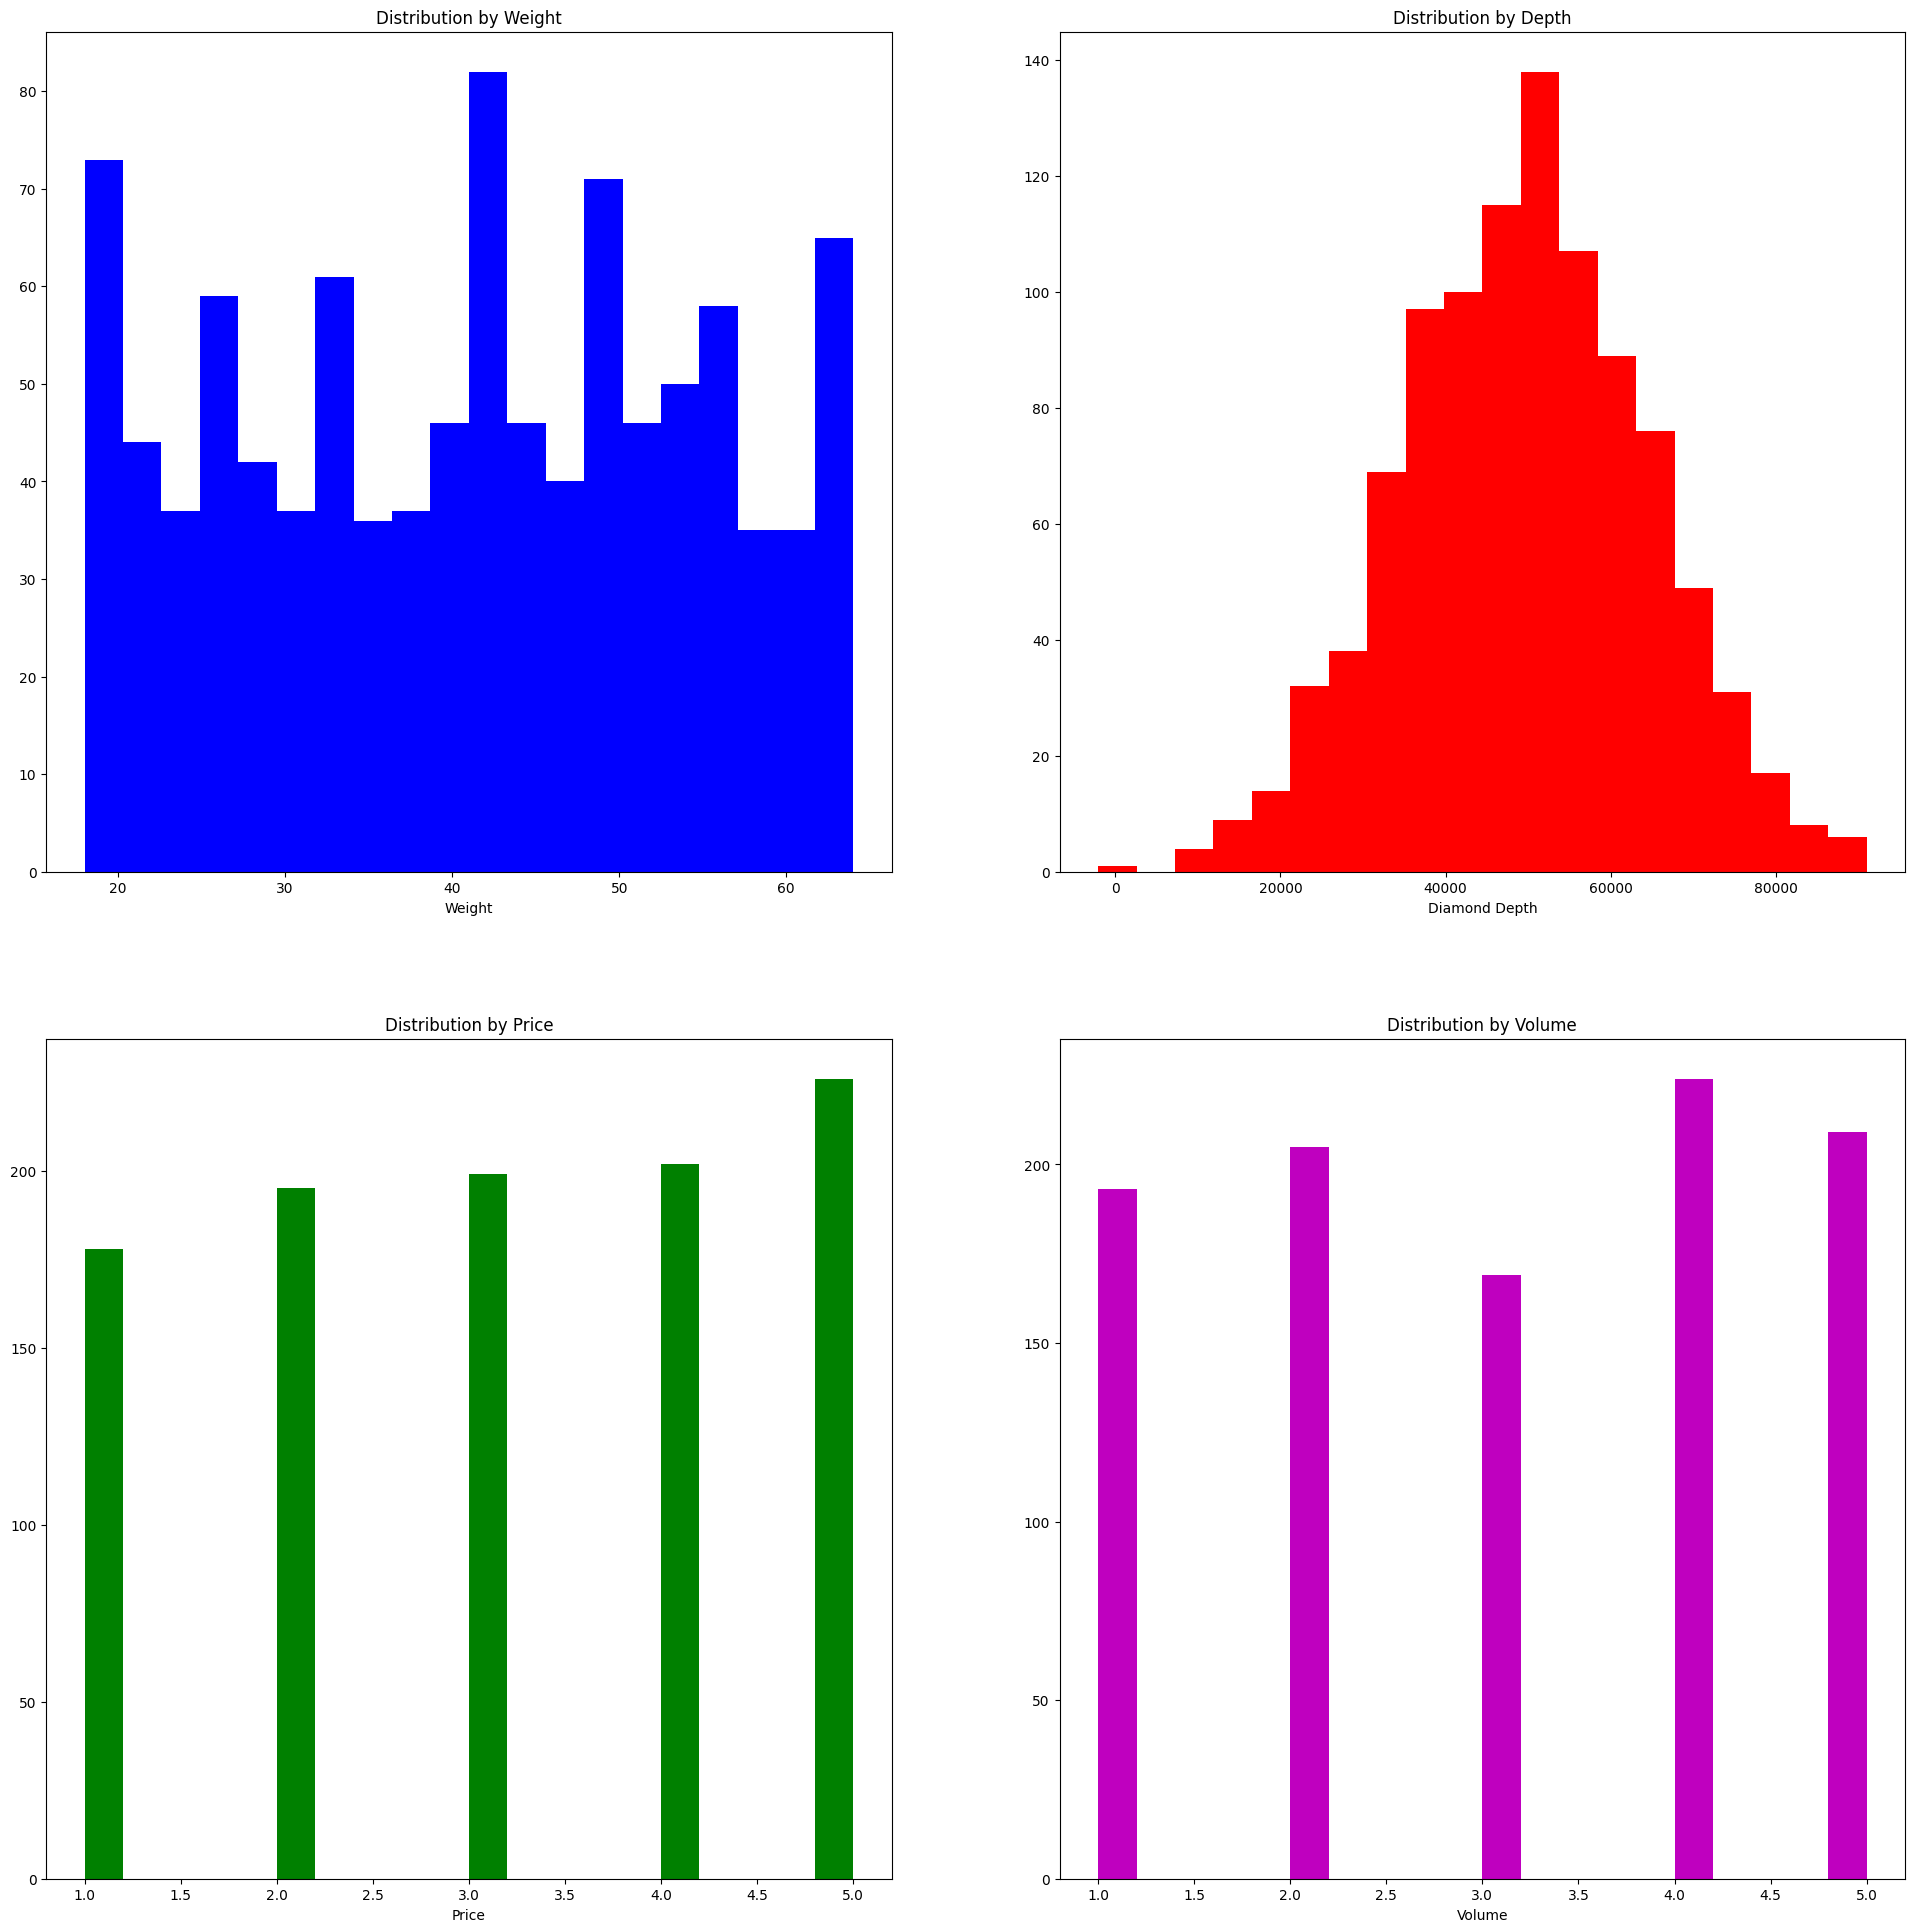

In [128]:
import matplotlib.pyplot as plt
 
plt.figure(figsize=[24,24])
 
plt.subplot(221)
plt.hist(df['Age'],bins=20,color='b')
plt.xlabel('Weight')
plt.title('Distribution by Weight')
 
plt.subplot(222)
plt.hist(df['Income'],bins=20,color='r')
plt.xlabel('Diamond Depth')
plt.title('Distribution by Depth')
 
plt.subplot(223)
plt.hist(df['FoodChoiceRating'],bins=20,color='g')
plt.xlabel('Price')
plt.title('Distribution by Price')
 
plt.subplot(224)
plt.hist(df['PastDietaryBehavior'],bins=20,color='m')
plt.xlabel('Volume')
plt.title('Distribution by Volume')

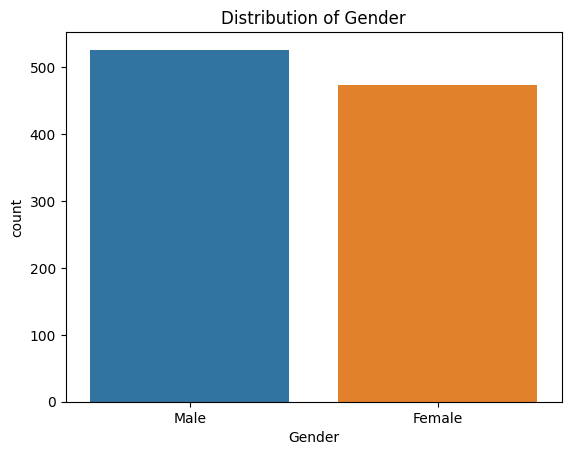

In [37]:
#check distribution of gender
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a countplot to visualize the distribution of gender
sns.countplot(x='Gender', data=df)

plt.title('Distribution of Gender')
plt.show()

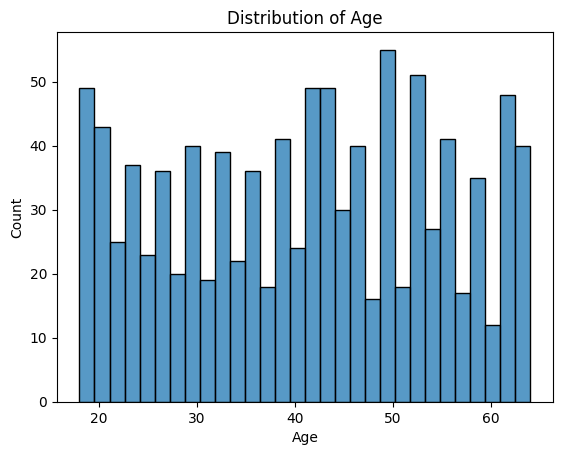

In [25]:
sns.histplot(df['Age'], bins=30)

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [31]:
df.describe()

,ParticipantID,Age,PastDietaryBehavior,Income,FoodChoiceRating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.986000,3.051000,49577.165170,3.047000
std,288.819436,13.497852,1.427037,14854.532293,1.398122
min,1.000000,18.000000,1.000000,-2071.450000,1.000000
25%,250.750000,29.000000,2.000000,39362.472500,2.000000
50%,500.500000,42.000000,3.000000,50059.225000,3.000000
75%,750.250000,52.000000,4.000000,59807.942500,4.000000
max,1000.000000,64.000000,5.000000,90963.010000,5.000000


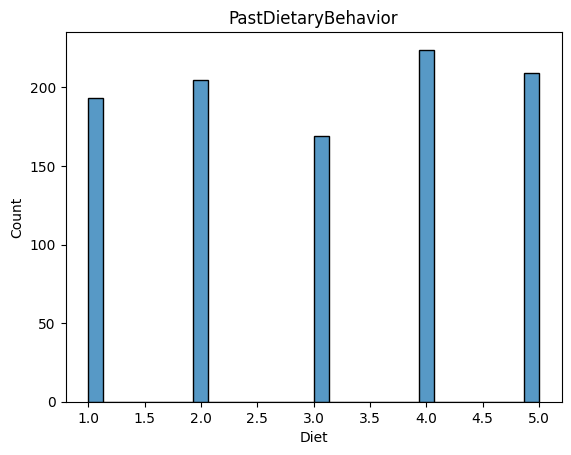

In [38]:
sns.histplot(df['PastDietaryBehavior'], bins=30)

plt.title('PastDietaryBehavior')
plt.xlabel('Diet')
plt.ylabel('Count')
plt.show()

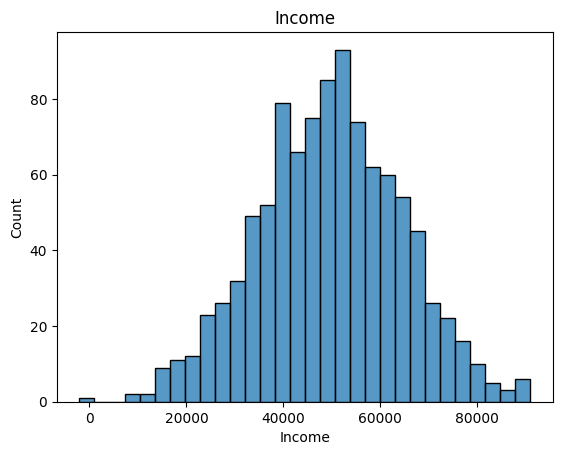

In [39]:
sns.histplot(df['Income'], bins=30)

plt.title('Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

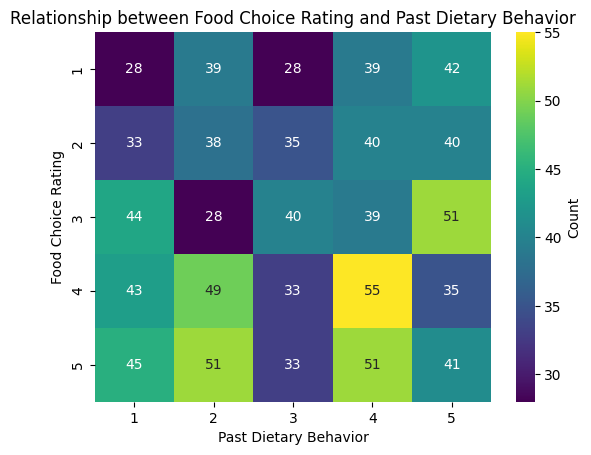

In [40]:
# Create a heatmap
heatmap_data = df.groupby(['FoodChoiceRating', 'PastDietaryBehavior']).size().unstack()
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='d', cbar_kws={'label': 'Count'})

# Set labels and title
plt.xlabel('Past Dietary Behavior')
plt.ylabel('Food Choice Rating')
plt.title('Relationship between Food Choice Rating and Past Dietary Behavior')

# Show the plot
plt.show()

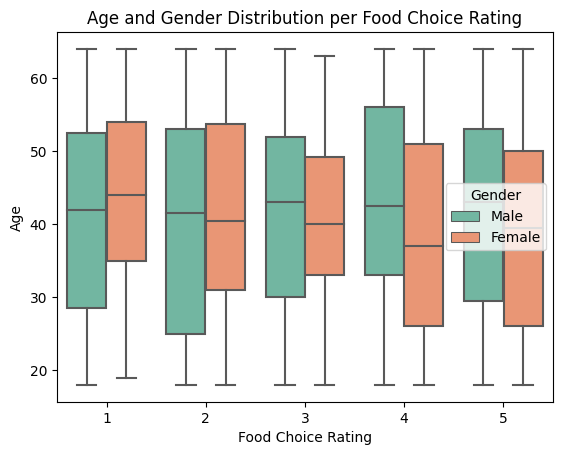

In [41]:

# Create a grouped boxplot or violin plot
sns.boxplot(x='FoodChoiceRating', y='Age', hue='Gender', data=df, palette='Set2')

plt.title('Age and Gender Distribution per Food Choice Rating')
plt.xlabel('Food Choice Rating')
plt.ylabel('Age')
plt.show()

In [ ]:
#create a variable to show change
#cluster into groups

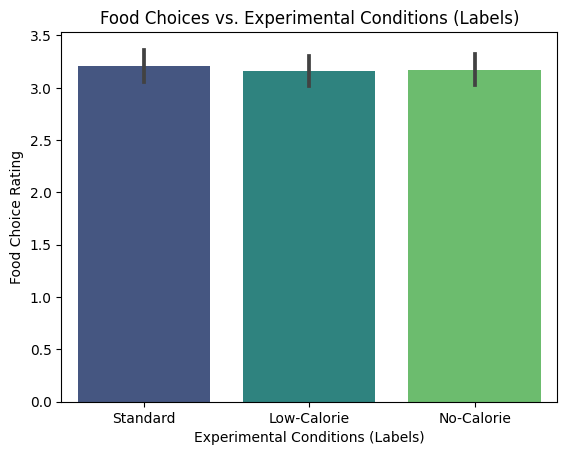

In [45]:
#label vs. health choice
sns.barplot(x='Labels', y='FoodChoiceRating', data=df, palette='viridis')

plt.title('Food Choices vs. Experimental Conditions (Labels)')
plt.xlabel('Experimental Conditions (Labels)')
plt.ylabel('Food Choice Rating')
plt.show()

In [46]:
#!pip install statsmodels



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
print(df.dtypes)


ParticipantID            int64
Age                      int32
Gender                  object
PastDietaryBehavior      int32
Income                 float64
Labels                  object
FoodChoiceRating         int32
dtype: object


In [129]:
#we need numeric data types

df= pd.get_dummies(df, columns=['Gender', 'Labels'], drop_first=False)
df = df.drop('Gender_Female', axis=1)


In [81]:
df

,ParticipantID,Age,PastDietaryBehavior,Income,FoodChoiceRating,Gender_Male,Labels_Low-Calorie,Labels_No-Calorie,Labels_Standard
0,1,56,2,35354.37,2,True,False,False,True
1,2,46,2,36613.16,4,False,True,False,False
2,3,32,2,55325.34,4,False,False,False,True
3,4,60,2,46683.30,2,False,False,True,False
4,5,25,5,37395.78,2,True,False,True,False
...,...,...,...,...,...,...,...,...,...
995,996,22,1,64377.15,3,True,True,False,False
996,997,40,4,33553.96,2,True,False,False,True
997,998,27,5,62573.55,2,False,False,True,False
998,999,61,4,68667.47,2,True,False,True,False


In [130]:
df = df.drop('Labels_No-Calorie', axis=1)


In [131]:
print(df.dtypes)
df['Gender_Male'] = df['Gender_Male'].astype(int)
df['Labels_Low-Calorie'] = df['Labels_Low-Calorie'].astype(int)
df['Labels_Standard'] = df['Labels_Standard'].astype(int)


ParticipantID            int64
Age                      int32
PastDietaryBehavior      int32
Income                 float64
FoodChoiceRating         int32
Gender_Male               bool
Labels_Low-Calorie        bool
Labels_Standard           bool
dtype: object


In [134]:

import statsmodels.api as sm

# Create interaction terms
df['Interaction_Age_LowCalorie'] = df['Age'] * df['Labels_Low-Calorie']
df['Interaction_Age_Standard'] = df['Age'] * df['Labels_Standard']
df['Interaction_Gender_LowCalorie'] = df['Gender_Male'] * df['Labels_Low-Calorie']



# Fit linear regression model with interactions
X = sm.add_constant(df[['Age', 'Gender_Male', 'Labels_Low-Calorie', 'Labels_Standard', 'PastDietaryBehavior',
                        'Interaction_Age_LowCalorie', 'Interaction_Age_Standard', 'Interaction_Gender_LowCalorie']])
y = df['FoodChoiceRating']

linear_model = sm.OLS(y, X)
result = linear_model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       FoodChoiceRating   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.378
Date:                Wed, 31 Jan 2024   Prob (F-statistic):             0.0154
Time:                        13:37:21   Log-Likelihood:                -1756.6
No. Observations:                1000   AIC:                             3531.
Df Residuals:                     991   BIC:                             3575.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### Model Summary

**Dependent Variable**: FoodChoiceRating

**R-squared**: The coefficient of determination, representing the proportion of the variance in the dependent variable that is predictable from the independent variables. In your case, it's quite low (0.024), indicating that the model explains a small portion of the variance in FoodChoiceRating.

**Adjusted R-squared**: Similar to R-squared but adjusted for the number of predictors. It's 0.020.

**F-statistic**: A test statistic for the overall significance of the model. The associated p-value is low (0.000161), suggesting that at least one of the independent variables is statistically significant.

### Coefficients Table:
* const (Intercept): The intercept term. When all other variables are zero, the estimated mean value of FoodChoiceRating is 3.9411.

* Age: A one-unit increase in Age is associated with a decrease of 0.0084 units in FoodChoiceRating. This effect is statistically significant (p-value: 0.011).

* Gender_Male: Being male is associated with a decrease of 0.2549 units in FoodChoiceRating compared to being female. This effect is statistically significant (p-value: 0.004).

* Labels_No-Calorie: The coefficient suggests a decrease of 0.0175 units in FoodChoiceRating for Labels_No-Calorie, but it's not statistically significant (p-value: 0.870).

* Labels_Standard: The coefficient suggests an increase of 0.0552 units in FoodChoiceRating for Labels_Standard, but it's not statistically significant (p-value: 0.615).

* PastDietaryBehavior: A one-unit increase in PastDietaryBehavior is associated with a decrease of 0.0980 units in FoodChoiceRating. This effect is statistically significant (p-value: 0.002).

### Additional Information:

* Omnibus: A test of the normality of the residuals. A low p-value (0.000) suggests that the residuals are not normally distributed.

* Durbin-Watson: A test for the presence of autocorrelation in the residuals. The value of 1.954 suggests little autocorrelation.

* Jarque-Bera (JB): Another test of normality. A low p-value (2.37e-14) indicates non-normality.

* Skew: A measure of the asymmetry of the residuals. Close to zero suggests symmetry.

* Kurtosis: A measure of the "tailedness" of the residuals. A value of 1.820 indicates relatively mild tails.

### Interpretation:

* The model suggests that Age, Gender, and PastDietaryBehavior are statistically significant predictors of FoodChoiceRating.

* The variables Labels_No-Calorie and Labels_Standard do not seem to have a statistically significant impact on FoodChoiceRating in this model.

* The low R-squared suggests that there may be other factors not included in the model that also influence FoodChoiceRating.

In [106]:
#let's create a composite behaviour change metric
df['behaviour_change'] = df['FoodChoiceRating']-df['PastDietaryBehavior']

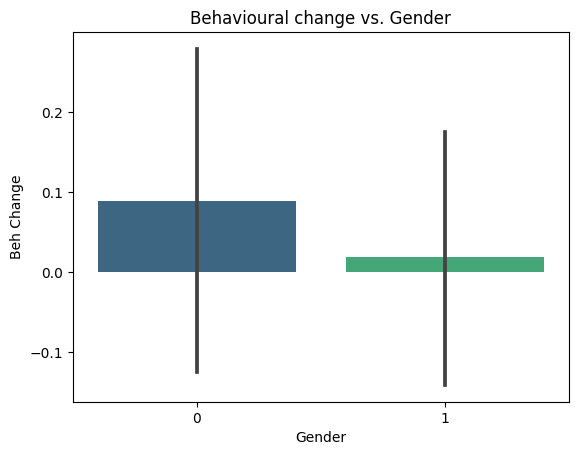

In [109]:
sns.barplot(x='Gender_Male', y='behaviour_change', data=df, palette='viridis')

plt.title('Behavioural change vs. Gender')
plt.xlabel('Gender')
plt.ylabel('Beh Change')
plt.show()

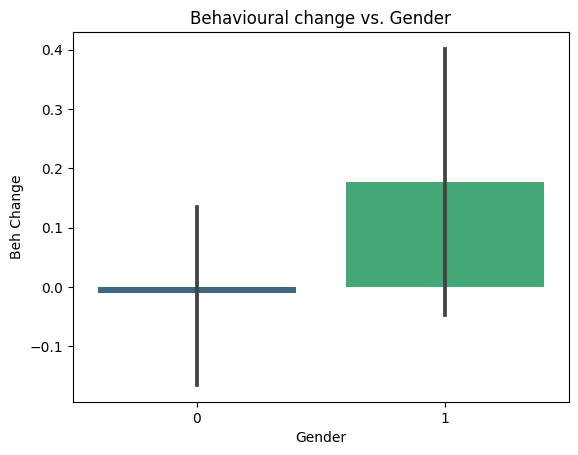

In [111]:
sns.barplot(x='Labels_Low-Calorie', y='behaviour_change', data=df, palette='viridis')

plt.title('Behavioural change vs. Gender')
plt.xlabel('Gender')
plt.ylabel('Beh Change')
plt.show()

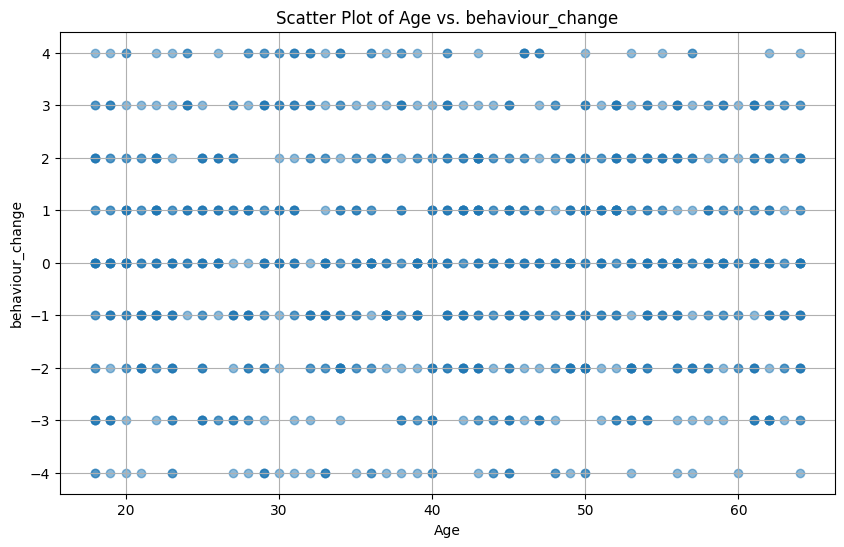

In [112]:
import matplotlib.pyplot as plt

# Assuming df_regression is your DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['behaviour_change'], alpha=0.5)
plt.title('Scatter Plot of Age vs. behaviour_change')
plt.xlabel('Age')
plt.ylabel('behaviour_change')
plt.grid(True)
plt.show()

In [108]:
import statsmodels.api as sm




# Add interaction terms
#df['Interaction_Age_Gender'] = df['Age'] * (df['Gender_Male'] == 0)
#df['Interaction_LowCalorie_Gender'] = df['Labels_Low-Calorie'] * (df['Gender_Male'] == 0)
df['Interaction_Age_Gender'] =  (df['Gender_Male'] == 0)*df['Age'] 


# Fit the multiple linear regression model
# Fit linear regression model with interactions
X = sm.add_constant(df[['Age', 'Gender_Male', 'Labels_Low-Calorie', 'Labels_Standard',  'Interaction_Age_Gender']])
y = df['behaviour_change']

linear_model = sm.OLS(y, X)
result = linear_model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       behaviour_change   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5924
Date:                Tue, 30 Jan 2024   Prob (F-statistic):              0.706
Time:                        22:05:12   Log-Likelihood:                -2134.4
No. Observations:                1000   AIC:                             4281.
Df Residuals:                     994   BIC:                             4310.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [116]:
!pip install mord
import mord


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9896 sha256=f3eb1688a6c50d6502d895bf5e9cc40c6f9b5ba3d763741dbd79e1d14d420568
  Stored in directory: c:\users\karol\appdata\local\pip\cache\wheels\d1\fc\57\f2a2ad4ed0491ab6d5bb8642a90f1da9469397641e914743da
Successfully built mord


In [126]:
X = df[['Age', 'Gender_Male', 'Labels_Low-Calorie', 'Labels_Standard', 'PastDietaryBehavior',
                        'Interaction_Age_LowCalorie', 'Interaction_Age_Standard', 'Interaction_Gender_LowCalorie']]
y = df['FoodChoiceRating']

# Convert 'Gender' to numeric (1 for Female, 0 for Male)

# Fit ordered logistic regression model
model = mord.OrdinalRidge(alpha=1.0)  # You can adjust the alpha parameter
model.fit(X, y)

# Display coefficients
#print("Coefficients:", model.coef_)

# Predictions
predictions = model.predict(X)
#print("Predictions:", predictions)

C:\Users\karol\myvenv\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but OrdinalRidge was fitted without feature names
  warnings.warn(


In [138]:
df['behaviour_change'] = df['FoodChoiceRating']-df['PastDietaryBehavior']

In [121]:
df['behaviour_change_binary'] = (df['behaviour_change'] > 0).astype(int)


In [122]:
df

,ParticipantID,Age,PastDietaryBehavior,Income,FoodChoiceRating,Gender_Male,Labels_Low-Calorie,Labels_Standard,Interaction_Age_LowCalorie,Interaction_Age_Standard,Interaction_Gender_LowCalorie,Interaction_LowCalorie_Gender,behaviour_change,Interaction_Age_Gender,behaviour_change_binary
0,1,56,2,35354.37,2,1,0,1,0,56,0,0,0,0,0
1,2,46,2,36613.16,4,0,1,0,46,0,0,46,2,46,1
2,3,32,2,55325.34,1,0,0,1,0,32,0,0,-1,32,0
3,4,60,2,46683.30,2,0,0,0,0,0,0,0,0,60,0
4,5,25,5,37395.78,2,1,0,0,0,0,0,0,-3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,22,1,64377.15,3,1,1,0,22,0,1,0,2,0,1
996,997,40,4,33553.96,2,1,0,1,0,40,0,0,-2,0,0
997,998,27,5,62573.55,2,0,0,0,0,0,0,0,-3,27,0
998,999,61,4,68667.47,2,1,0,0,0,0,0,0,-2,0,0


In [ ]:
#https://analyticsindiamag.com/a-complete-tutorial-on-ordinal-regression-in-python/

In [125]:
import pandas as pd
import statsmodels.api as sm

# Assuming df is your DataFrame
# Make sure 'FoodChoiceRating' is binary (0 or 1)

# Select relevant columns for the model
X = df[['Age', 'Gender_Male', 'Labels_Low-Calorie', 'Labels_Standard', 'Interaction_Gender_LowCalorie']]
y = df['behaviour_change_binary']



# Add constant term for intercept
X = sm.add_constant(X)

# Fit logistic regression model
model = sm.Logit(y, X)
results = model.fit()

# Display summary including p-values
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.673309
         Iterations 4
                              Logit Regression Results                             
Dep. Variable:     behaviour_change_binary   No. Observations:                 1000
Model:                               Logit   Df Residuals:                      994
Method:                                MLE   Df Model:                            5
Date:                     Tue, 30 Jan 2024   Pseudo R-squ.:                0.001335
Time:                             22:43:51   Log-Likelihood:                -673.31
converged:                            True   LL-Null:                       -674.21
Covariance Type:                 nonrobust   LLR p-value:                    0.8760
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         

In [135]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
mod_prob = OrderedModel(df['FoodChoiceRating'],
                        df[['Age', 'Gender_Male', 'Labels_Low-Calorie', 'Labels_Standard', 'PastDietaryBehavior',
                        'Interaction_Age_LowCalorie', 'Interaction_Age_Standard', 'Interaction_Gender_LowCalorie']],
                        distr='probit')

In [136]:
res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 1.595681
         Iterations: 39
         Function evaluations: 43
         Gradient evaluations: 43


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:       FoodChoiceRating   Log-Likelihood:                -1595.7
Model:                   OrderedModel   AIC:                             3215.
Method:            Maximum Likelihood   BIC:                             3274.
Date:                Wed, 31 Jan 2024                                         
Time:                        13:37:55                                         
No. Observations:                1000                                         
Df Residuals:                     988                                         
Df Model:                           8                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Age                              -0.0010      0.004     -0.244      0.807      -0.009       0.007
Gender_Male                       0.0921      0.083      1.110      0.267      -0.070       0.255
Labels_Low-Calorie                0.6649      0.271      2.452      0.014       0.133       1.196
Labels_Standard                  -0.0236      0.259     -0.091      0.927      -0.532       0.485
PastDietaryBehavior              -0.0354      0.024     -1.504      0.133      -0.082       0.011
Interaction_Age_LowCalorie       -0.0062      0.006     -1.045      0.296      -0.018       0.005
Interaction_Age_Standard          0.0006      0.006      0.097      0.923      -0.011       0.013
Interaction_Gender_LowCalorie    -0.5142      0.144     -3.575      0.000      -0.796      -0.232
1/2                              -0.9900      0.193     -5.123      0.000      -1.369      -0.611
2/3                              -0.5066      0.065     -7.774      0.000      -0.634      -0.379
3/4                              -0.6743      0.065    -10.409      0.000      -0.801      -0.547
4/5                              -0.5444      0.064     -8.510      0.000      -0.670      -0.419
=================================================================================================
"""

                            OLS Regression Results                            
Dep. Variable:       behaviour_change   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.139
Date:                Tue, 30 Jan 2024   Prob (F-statistic):              0.337
Time:                        14:28:00   Log-Likelihood:                -2157.5
No. Observations:                1000   AIC:                             4325.
Df Residuals:                     995   BIC:                             4349.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5116      0.24

In [55]:
np_data = np.asarray(df)
np_data

array([[1, 56, 2, ..., True, False, True],
       [2, 46, 2, ..., False, False, False],
       [3, 32, 2, ..., False, False, True],
       ...,
       [998, 27, 5, ..., False, True, False],
       [999, 61, 4, ..., True, True, False],
       [1000, 19, 2, ..., True, False, True]], dtype=object)

In [ ]:
#https://365datascience.com/tutorials/python-tutorials/build-customer-segmentation-models/

In [139]:
#try segmentation
df_seg = df[['Age', 'Gender_Male', 'Labels_Low-Calorie', 'Labels_Standard', 'behaviour_change']]

Age: 


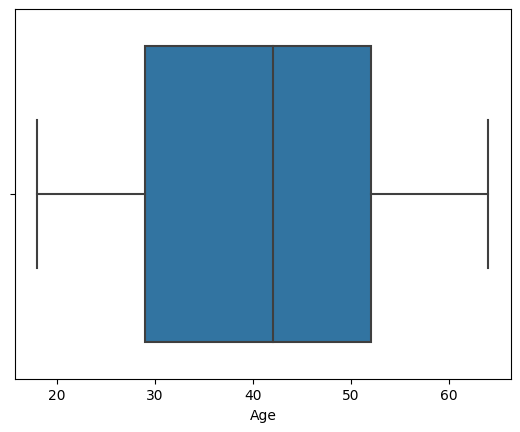

Gender_Male: 


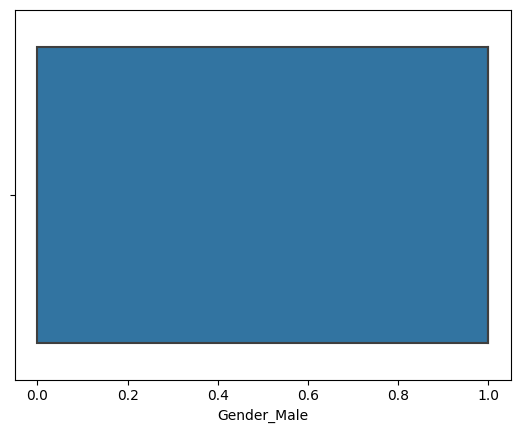

Labels_Low-Calorie: 


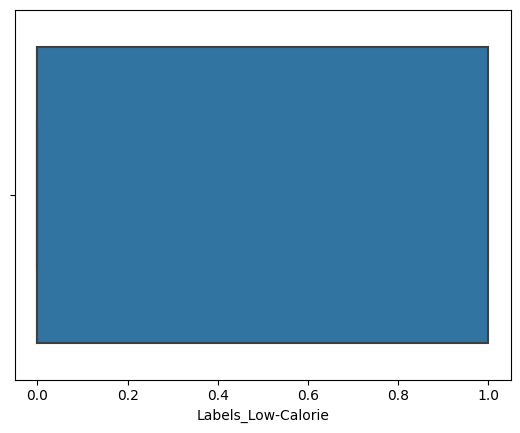

Labels_Standard: 


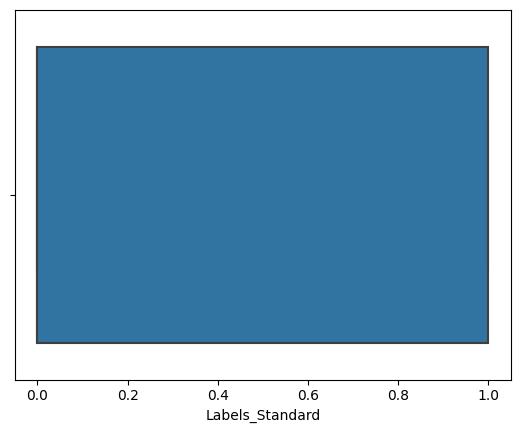

behaviour_change: 


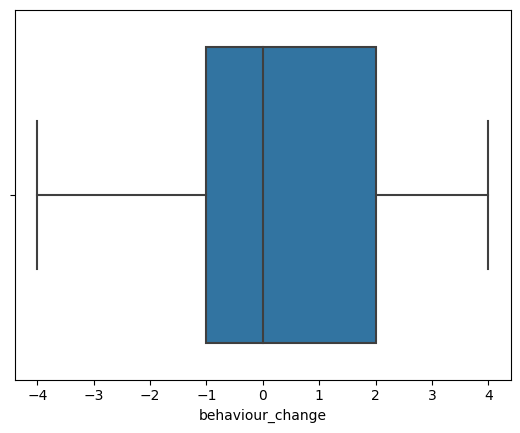

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
list1 = ['Age', 'Gender_Male', 'Labels_Low-Calorie', 'Labels_Standard', 'behaviour_change']
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=df_seg[str(i)])
    plt.show()

In [ ]:
#standardize

In [142]:
from sklearn.preprocessing import StandardScaler
#new_df = new_df.drop_duplicates()
col_names = ['Age', 'Gender_Male', 'Labels_Low-Calorie', 'Labels_Standard', 'behaviour_change']
features = df_seg[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

In [143]:
scaled_features

,Age,Gender_Male,Labels_Low-Calorie,Labels_Standard,behaviour_change
0,1.112882,0.949284,-0.708168,1.471243,-0.025388
1,0.371652,-1.053425,1.412095,-0.679697,0.951059
2,-0.666069,-1.053425,-0.708168,1.471243,-0.513611
3,1.409373,-1.053425,-0.708168,-0.679697,-0.025388
4,-1.184929,0.949284,-0.708168,-0.679697,-1.490058
...,...,...,...,...,...
995,-1.407298,0.949284,1.412095,-0.679697,0.951059
996,-0.073085,0.949284,-0.708168,1.471243,-1.001835
997,-1.036683,-1.053425,-0.708168,-0.679697,-1.490058
998,1.483496,0.949284,-0.708168,-0.679697,-1.001835


In clustering, such as K-means clustering, the concept of training and testing sets is somewhat different from supervised learning tasks. Clustering is an unsupervised learning technique, and there's no ground truth or labeled data to evaluate the model in a traditional sense.

However, a common practice is to split your data into training and testing sets for exploratory and diagnostic purposes. Here's how you might approach it:

Training Set:

Use a subset of your data (e.g., 80% of the data) for clustering.
Apply the K-means algorithm on this subset to create clusters.
Testing Set:

Use the remaining portion of the data (e.g., 20% of the data) as a testing set.
Assign data points in the testing set to the clusters created during the training phase.
Evaluation:

While there's no traditional evaluation like accuracy in clustering, you can still assess the performance by inspecting cluster assignments and characteristics.
Evaluate whether the clusters make sense based on domain knowledge or any business criteria.
Adjustment:

If the clusters aren't meaningful or don't align with expectations, you might need to adjust parameters (e.g., the number of clusters, k) or revisit your feature selection.
Remember, clustering is often more exploratory in nature, and the evaluation is subjective. The goal is to create clusters that make sense for the problem at hand. If you have labeled data, you might use metrics like the silhouette score to assess the quality of clustering, but in many cases, clusters are used for exploratory analysis rather than predictive modeling.

C:\Users\karol\myvenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karol\myvenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karol\myvenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karol\myvenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Text(0, 0.5, 'Inertia')

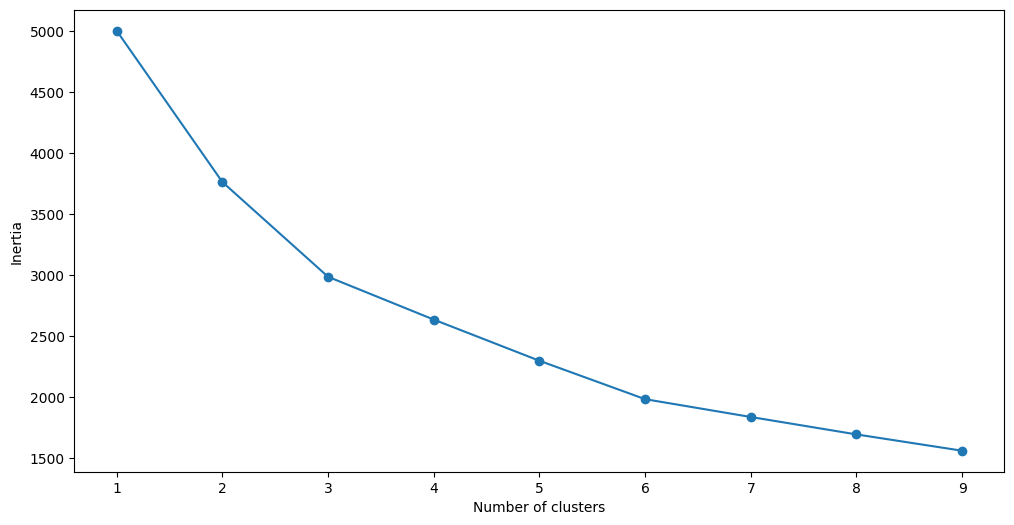

In [144]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
#hmm 3 or 6 clusters

In [156]:
# First, build a model with 4 clusters
kmeans = KMeans( n_clusters = 6, init='k-means++')
kmeans.fit(scaled_features)
print(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))


0.3574076070788245


C:\Users\karol\myvenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [157]:
pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(df_seg)
frame['cluster'] = pred

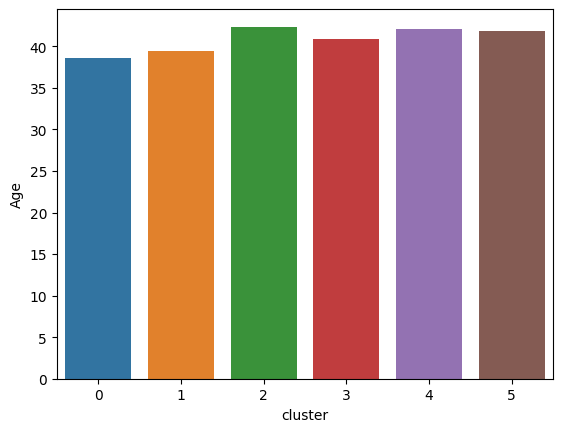

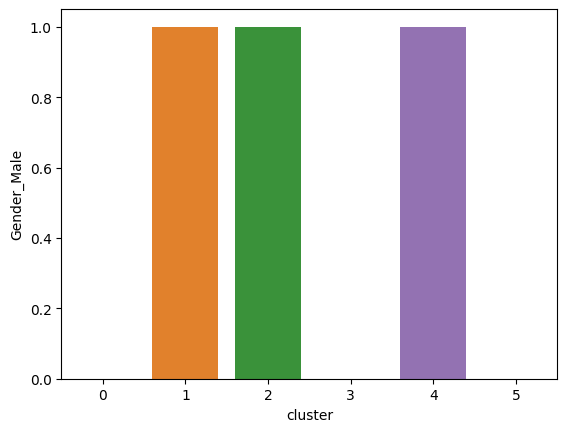

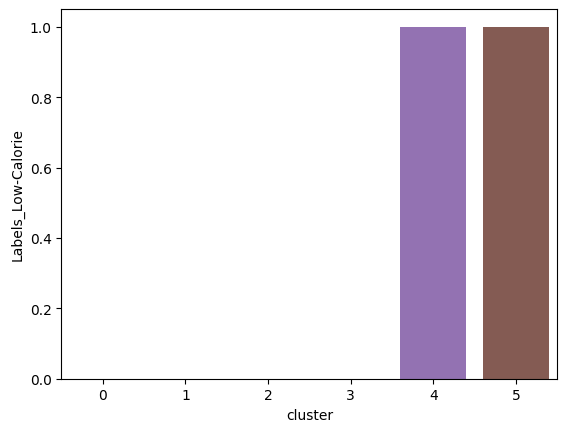

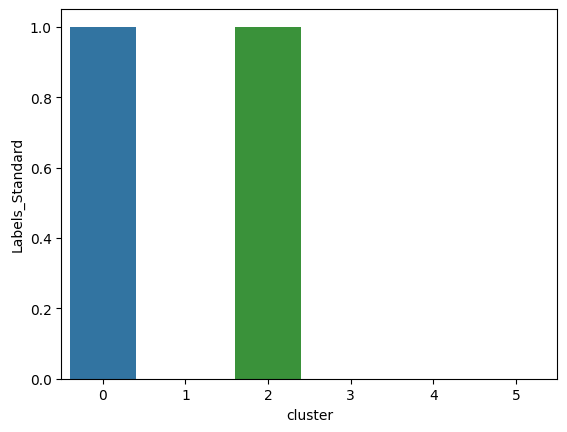

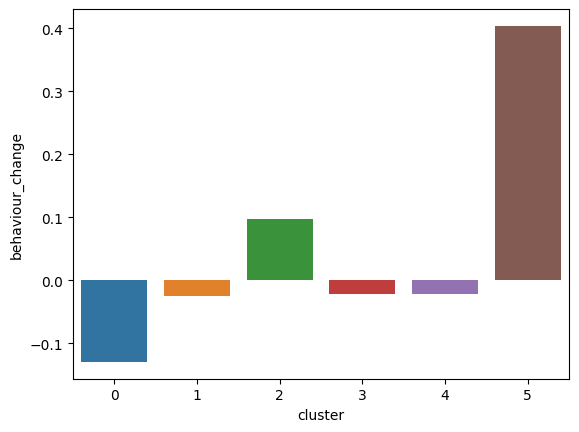

In [158]:
avg_df = frame.groupby(['cluster'], as_index=False).mean()
for i in list1:
    sns.barplot(x='cluster',y=str(i),data=avg_df)
    plt.show()

In [ ]:
#https://365datascience.com/tutorials/python-tutorials/build-customer-segmentation-models/